In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#importing the apple health data as a csv

my_health_data = pd.read_csv(r'/Users/Chris/Desktop/my apple cumulative health data.csv', parse_dates=['Date'])

In [7]:
my_health_data.head()

,Date,Active energy burned(kcal),Apple exercise time(min),Distance walking / running(mi),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min)
0,2019-08-16,725.84,79.0,6.07,6.0,86.57,60.0,11859.00,109.0
1,2019-08-17,870.63,102.0,5.13,10.0,80.35,56.0,10368.00,97.0
2,2019-08-18,742.96,71.0,6.62,5.0,75.01,54.0,12955.00,96.0
3,2019-08-19,723.93,44.0,5.33,9.0,77.77,59.0,11032.00,96.0
4,2019-08-20,731.56,55.0,5.52,10.0,78.29,54.0,11366.63,98.0


In [8]:
my_health_data.describe()

,Active energy burned(kcal),Apple exercise time(min),Distance walking / running(mi),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min)
count,350.000000,345.000000,366.000000,361.000000,345.000000,341.000000,366.000000,331.000000
mean,664.712686,43.182609,4.481503,8.642493,75.985826,58.114370,9262.457678,96.419940
std,197.669942,25.025307,1.546590,4.249854,6.393317,3.127929,3122.240958,11.106322
min,0.070000,1.000000,0.100000,1.000000,58.670000,51.000000,181.000000,69.000000
25%,572.845000,22.000000,3.585000,5.920000,71.310000,56.000000,7465.922500,88.000000
50%,696.815000,43.000000,4.445000,8.000000,75.220000,58.000000,9195.500000,97.000000
75%,784.950000,63.000000,5.542500,11.000000,80.690000,60.000000,11404.750000,104.000000
max,1121.240000,115.000000,9.630000,24.000000,104.330000,68.000000,18922.000000,137.000000


In [9]:
my_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   366 non-null    datetime64[ns]
 1   Active energy burned(kcal)             350 non-null    float64       
 2   Apple exercise time(min)               345 non-null    float64       
 3   Distance walking / running(mi)         366 non-null    float64       
 4   Flights climbed(count)                 361 non-null    float64       
 5   Heart rate(count/min)                  345 non-null    float64       
 6   Resting heart rate(count/min)          341 non-null    float64       
 7   Step count(count)                      366 non-null    float64       
 8   Walking heart rate average(count/min)  331 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.9 KB


Text(0.0, 1.0, 'Distance walked or ran in the past year (source: Apple Health Data)')

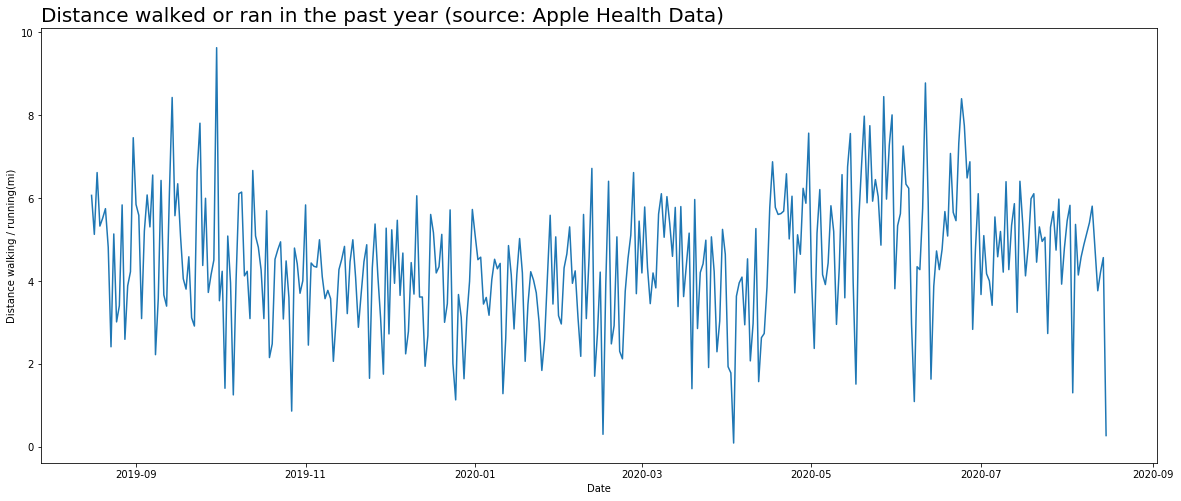

In [10]:
#visualizing distance over time

fig, ax = plt.subplots(figsize = (20, 8))
chart = sns.lineplot(x='Date', y='Distance walking / running(mi)', data=my_health_data)
# ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right') #  this removes the x tick labels altogether
ax.set_title("Distance walked or ran in the past year (source: Apple Health Data)", loc='left', fontdict={'fontsize':20})


In [11]:
# averages by day of week

my_health_data['dow'] = my_health_data['Date'].dt.strftime('%A')

In [12]:
days_grouped = my_health_data.groupby('dow')

In [13]:
days_grouped.get_group('Monday').head()

,Date,Active energy burned(kcal),Apple exercise time(min),Distance walking / running(mi),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min),dow
3,2019-08-19,723.93,44.0,5.33,9.0,77.77,59.0,11032.00,96.0,Monday
10,2019-08-26,557.20,20.0,3.41,13.0,70.43,58.0,7604.81,93.5,Monday
17,2019-09-02,745.49,48.0,5.59,8.0,80.04,59.0,11730.00,94.0,Monday
24,2019-09-09,753.44,64.0,3.58,9.0,77.56,54.0,7797.67,102.0,Monday
31,2019-09-16,861.07,43.0,6.35,11.0,75.55,54.0,12945.00,103.0,Monday


In [14]:
# exploring distance by dow

distance_by_dow = days_grouped['Distance walking / running(mi)']

In [15]:
distance_by_dow = pd.DataFrame(distance_by_dow.agg([np.min, np.max, np.mean]))
distance_by_dow

,amin,amax,mean
dow,,,
Friday,0.10,7.75,4.716038
Monday,1.31,9.63,4.787885
Saturday,0.28,8.43,4.012264
Sunday,0.31,6.67,3.818077
Thursday,1.41,8.78,4.486923
Tuesday,2.02,7.81,4.865769
Wednesday,1.14,8.45,4.688077


In [16]:
distance_by_dow = distance_by_dow.reset_index()
distance_by_dow

,dow,amin,amax,mean
0,Friday,0.10,7.75,4.716038
1,Monday,1.31,9.63,4.787885
2,Saturday,0.28,8.43,4.012264
3,Sunday,0.31,6.67,3.818077
4,Thursday,1.41,8.78,4.486923
5,Tuesday,2.02,7.81,4.865769
6,Wednesday,1.14,8.45,4.688077


In [17]:
# prepping to visualize by dow

# changing days to numbers to preserve order when plotted

days_num = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
distance_by_dow["dow_num"] = distance_by_dow["dow"].map(days_num)

Text(0.0, 1.0, 'Mean distance by day of week (source: Apple Health Data)')

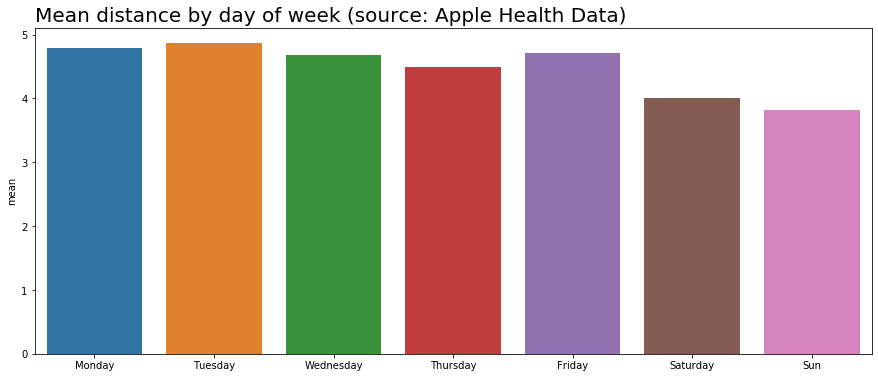

In [18]:

# list to correct numbers back to day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sun"]

fig, ax = plt.subplots(figsize = (15, 6))
chart=sns.barplot(x='dow_num', y='mean', data=distance_by_dow)
chart.set_xticklabels(days)
ax.set_xlabel('')
ax.set_title("Mean distance by day of week (source: Apple Health Data)", loc='left', fontdict={'fontsize':20})

In [19]:
# same as above but with exercise time

exercise_time_by_dow = days_grouped['Apple exercise time(min)']

In [20]:
exercise_time_by_dow = pd.DataFrame(exercise_time_by_dow.agg([np.min, np.max, np.mean]))
exercise_time_by_dow.reset_index(inplace=True)
exercise_time_by_dow

,dow,amin,amax,mean
0,Friday,4.0,107.0,45.352941
1,Monday,1.0,115.0,41.458333
2,Saturday,1.0,102.0,42.081633
3,Sunday,1.0,101.0,41.234043
4,Thursday,4.0,107.0,42.591837
5,Tuesday,12.0,99.0,44.900000
6,Wednesday,6.0,92.0,44.372549


Text(0.0, 1.0, 'Mean exercise time by day of week (source: Apple Health Data)')

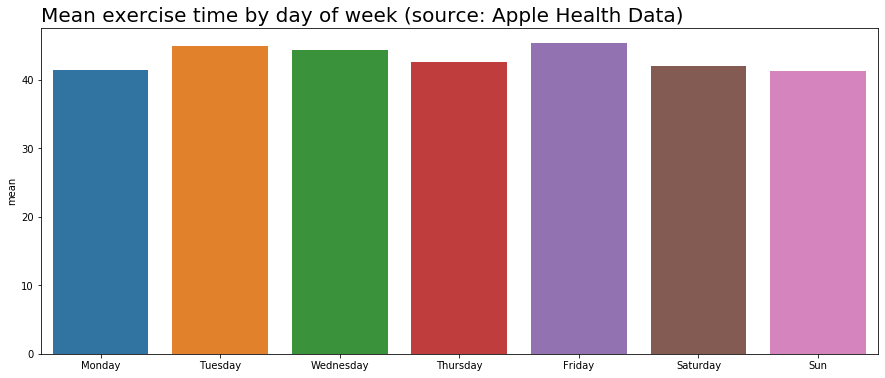

In [21]:
days_num = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
exercise_time_by_dow["dow_num"] = exercise_time_by_dow["dow"].map(days_num)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sun"]

fig, ax = plt.subplots(figsize = (15, 6))

chart=sns.barplot(x='dow_num', y='mean', data=exercise_time_by_dow)
chart.set_xticklabels(days)
ax.set_xlabel('')
ax.set_title("Mean exercise time by day of week (source: Apple Health Data)", loc='left', fontdict={'fontsize':20})

In [22]:
# load workout data

my_workout_data = pd.read_csv(r'/Users/Chris/Desktop/My apple workout data.csv', parse_dates=['Date'])

In [23]:
my_workout_data.head()

,Date,Active energy burned(kcal),Activity,Distance(mi),Duration(Seconds),Flights climbed(count),Swimming stroke count(count)
0,2019-08-16 14:22:15 - 2019-08-16 15:34:22,412.13,Walking,4.15,4326.73,NaN,NaN
1,2019-08-17 11:03:00 - 2019-08-17 11:09:22,29.70,Walking,0.29,375.74,NaN,NaN
2,2019-08-17 11:09:22 - 2019-08-17 11:55:48,214.82,Traditional Strength Training,NaN,2785.73,NaN,NaN
3,2019-08-17 19:29:38 - 2019-08-17 20:01:37,170.63,Walking,1.83,1919.74,NaN,NaN
4,2019-08-18 19:36:54 - 2019-08-18 20:36:43,295.09,Walking,3.37,3589.26,NaN,NaN


In [24]:
my_workout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          320 non-null    object 
 1   Active energy burned(kcal)    319 non-null    float64
 2   Activity                      320 non-null    object 
 3   Distance(mi)                  261 non-null    float64
 4   Duration(Seconds)             320 non-null    float64
 5   Flights climbed(count)        0 non-null      float64
 6   Swimming stroke count(count)  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 17.6+ KB


In [25]:
# divide the 'Date' into start and stop col

my_workout_data['Date'] = my_workout_data['Date'].str.split(' - ')

my_workout_data['Activity start'] = pd.to_datetime(my_workout_data['Date'].str[0]).dt.normalize() 
# normalize to keep only date, no time

# if you want the end datetime as well
# my_workout_data['Activity end'] = pd.to_datetime(my_workout_data['Date'].str[1])

# change 'Duration' to minutes
my_workout_data['Workout Duration(Min)'] = round(my_workout_data['Duration(Seconds)'] / 60)

# renaming to match my_health data for merge
my_workout_data = my_workout_data.rename(columns = {'Date': 'Workout times', 'Activity start':'Date'})
my_workout_data.head()

,Workout times,Active energy burned(kcal),Activity,Distance(mi),Duration(Seconds),Flights climbed(count),Swimming stroke count(count),Date,Workout Duration(Min)
0,"[2019-08-16 14:22:15, 2019-08-16 15:34:22]",412.13,Walking,4.15,4326.73,NaN,NaN,2019-08-16,72.0
1,"[2019-08-17 11:03:00, 2019-08-17 11:09:22]",29.70,Walking,0.29,375.74,NaN,NaN,2019-08-17,6.0
2,"[2019-08-17 11:09:22, 2019-08-17 11:55:48]",214.82,Traditional Strength Training,NaN,2785.73,NaN,NaN,2019-08-17,46.0
3,"[2019-08-17 19:29:38, 2019-08-17 20:01:37]",170.63,Walking,1.83,1919.74,NaN,NaN,2019-08-17,32.0
4,"[2019-08-18 19:36:54, 2019-08-18 20:36:43]",295.09,Walking,3.37,3589.26,NaN,NaN,2019-08-18,60.0


In [26]:
# activity types

my_workout_data['Activity'].value_counts()

Walking                          251
Traditional Strength Training     30
Other                             14
Running                           10
Elliptical                         6
Functional Strength Training       4
HIIT                               4
Rowing                             1
Name: Activity, dtype: int64

In [27]:
# Many days have multiple workouts in a day
# need to group the workout days BEFORE joining with health data of all health totals get multiplied with groupby

workouts_grouped = my_workout_data.groupby('Date')
grouped_workouts_totals = pd.DataFrame(workouts_grouped.sum())
grouped_workouts_totals.reset_index(inplace=True)
grouped_workouts_totals.head()

,Date,Active energy burned(kcal),Distance(mi),Duration(Seconds),Flights climbed(count),Swimming stroke count(count),Workout Duration(Min)
0,2019-08-16,412.13,4.15,4326.73,0.0,0.0,72.0
1,2019-08-17,415.15,2.12,5081.21,0.0,0.0,84.0
2,2019-08-18,295.09,3.37,3589.26,0.0,0.0,60.0
3,2019-08-19,266.93,2.94,3744.48,0.0,0.0,63.0
4,2019-08-20,241.60,2.69,3477.70,0.0,0.0,58.0


In [28]:
# join the health data and workout df on date

health_exercise = pd.merge(left=grouped_workouts_totals, right=my_health_data, on='Date', how='outer', suffixes=('w','h'))

In [29]:
health_exercise.head()

,Date,Active energy burned(kcal)w,Distance(mi),Duration(Seconds),Flights climbed(count)w,Swimming stroke count(count),Workout Duration(Min),Active energy burned(kcal)h,Apple exercise time(min),Distance walking / running(mi),Flights climbed(count)h,Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min),dow
0,2019-08-16,412.13,4.15,4326.73,0.0,0.0,72.0,725.84,79.0,6.07,6.0,86.57,60.0,11859.00,109.0,Friday
1,2019-08-17,415.15,2.12,5081.21,0.0,0.0,84.0,870.63,102.0,5.13,10.0,80.35,56.0,10368.00,97.0,Saturday
2,2019-08-18,295.09,3.37,3589.26,0.0,0.0,60.0,742.96,71.0,6.62,5.0,75.01,54.0,12955.00,96.0,Sunday
3,2019-08-19,266.93,2.94,3744.48,0.0,0.0,63.0,723.93,44.0,5.33,9.0,77.77,59.0,11032.00,96.0,Monday
4,2019-08-20,241.60,2.69,3477.70,0.0,0.0,58.0,731.56,55.0,5.52,10.0,78.29,54.0,11366.63,98.0,Tuesday


Text(0.5, 0, '')

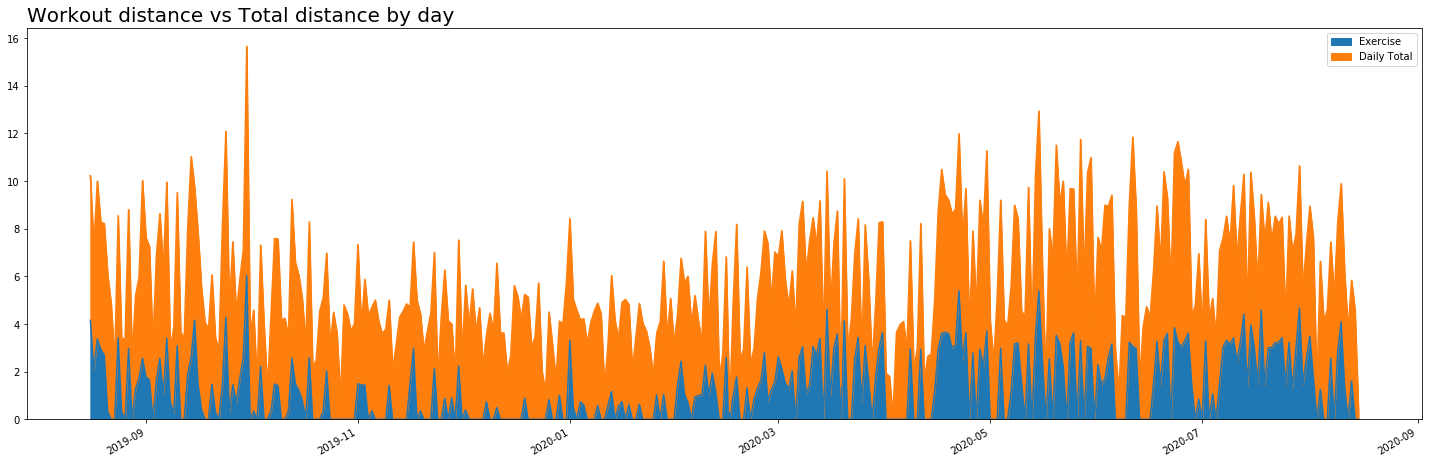

In [30]:
# stacked area chart of distances

distance_compare = health_exercise[['Date','Distance(mi)', 'Distance walking / running(mi)']]
distance_compare = distance_compare.rename(columns = {'Distance(mi)':'Exercise', 'Distance walking / running(mi)':'Daily Total'})
distance_compare.set_index('Date', inplace=True)

distance_compare.plot.area(figsize=(25,8))
plt.title("Workout distance vs Total distance by day", loc='left', fontdict={'fontsize':20})
plt.xlabel('')

In [31]:
# can we generate a daily proportion of workout vs daily totals and visualize that?

In [32]:
health_exercise.head(3)

,Date,Active energy burned(kcal)w,Distance(mi),Duration(Seconds),Flights climbed(count)w,Swimming stroke count(count),Workout Duration(Min),Active energy burned(kcal)h,Apple exercise time(min),Distance walking / running(mi),Flights climbed(count)h,Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min),dow
0,2019-08-16,412.13,4.15,4326.73,0.0,0.0,72.0,725.84,79.0,6.07,6.0,86.57,60.0,11859.0,109.0,Friday
1,2019-08-17,415.15,2.12,5081.21,0.0,0.0,84.0,870.63,102.0,5.13,10.0,80.35,56.0,10368.0,97.0,Saturday
2,2019-08-18,295.09,3.37,3589.26,0.0,0.0,60.0,742.96,71.0,6.62,5.0,75.01,54.0,12955.0,96.0,Sunday


In [33]:
health_exercise['Workout % of daily total'] = round((health_exercise['Distance(mi)'] / health_exercise['Distance walking / running(mi)']) * 100)
health_exercise.head(3)

,Date,Active energy burned(kcal)w,Distance(mi),Duration(Seconds),Flights climbed(count)w,Swimming stroke count(count),Workout Duration(Min),Active energy burned(kcal)h,Apple exercise time(min),Distance walking / running(mi),Flights climbed(count)h,Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min),dow,Workout % of daily total
0,2019-08-16,412.13,4.15,4326.73,0.0,0.0,72.0,725.84,79.0,6.07,6.0,86.57,60.0,11859.0,109.0,Friday,68.0
1,2019-08-17,415.15,2.12,5081.21,0.0,0.0,84.0,870.63,102.0,5.13,10.0,80.35,56.0,10368.0,97.0,Saturday,41.0
2,2019-08-18,295.09,3.37,3589.26,0.0,0.0,60.0,742.96,71.0,6.62,5.0,75.01,54.0,12955.0,96.0,Sunday,51.0


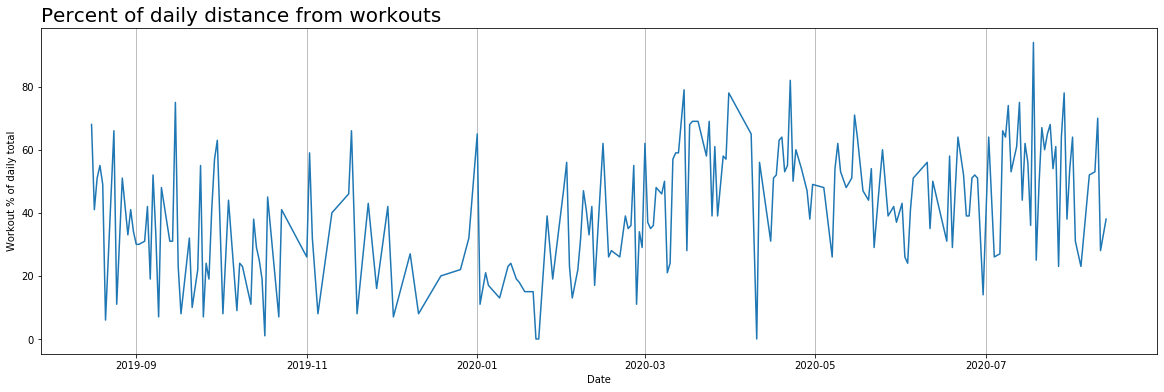

In [34]:
fig, ax = plt.subplots(figsize = (20, 6))
chart = sns.lineplot(x='Date', y='Workout % of daily total', data=health_exercise)
ax.set_title("Percent of daily distance from workouts", loc='left', fontdict={'fontsize':20})
ax.xaxis.grid()

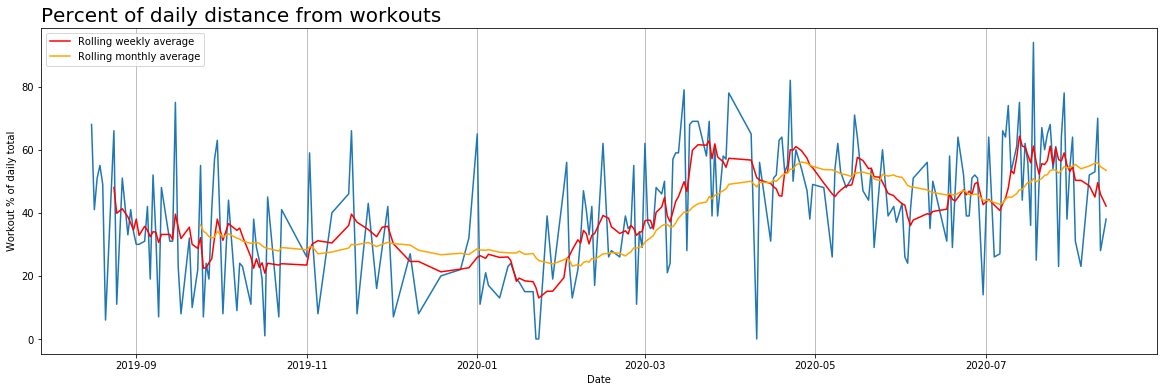

In [42]:
# can we add a trendline?

rolling_mean = health_exercise['Workout % of daily total'].rolling(window=7).mean()
rolling_mean2 = health_exercise['Workout % of daily total'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize = (20, 6))
chart = sns.lineplot(x='Date', y='Workout % of daily total', data=health_exercise)
chart2 = sns.lineplot(x='Date', y=rolling_mean, label='Rolling weekly average',data=health_exercise, color='red')
chart3 = sns.lineplot(x='Date', y=rolling_mean2, label='Rolling monthly average',data=health_exercise, color='orange')
ax.set_title("Percent of daily distance from workouts", loc='left', fontdict={'fontsize':20})
ax.xaxis.grid()